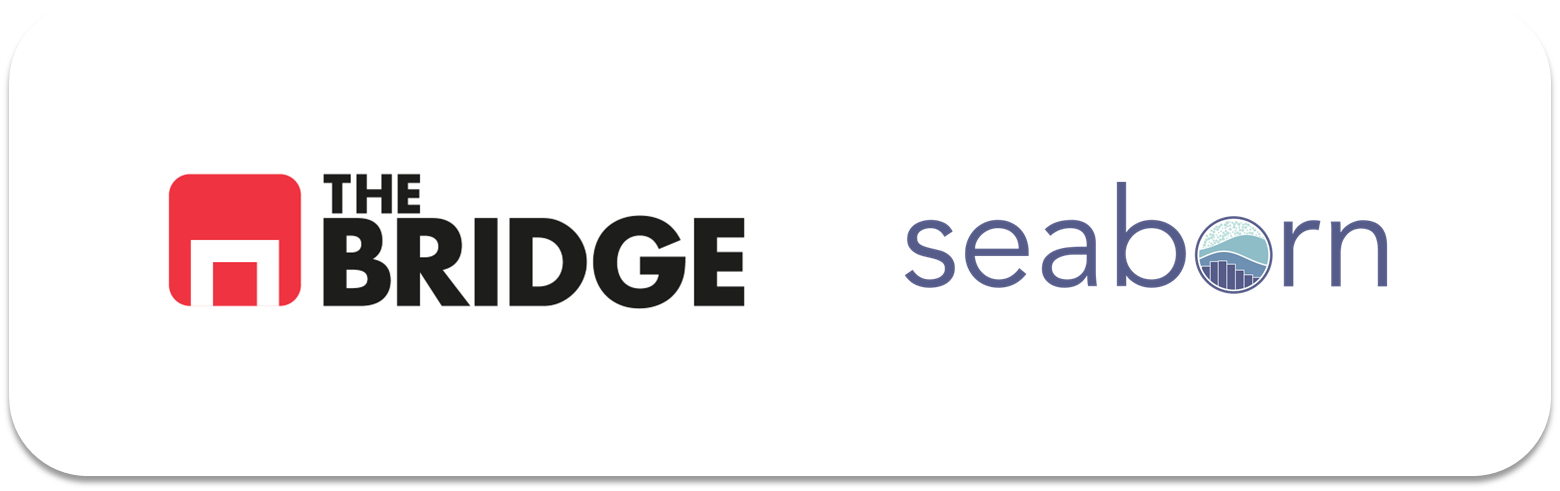

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [2]:

file_path = './data/california_cities.csv'
california_cities = pd.read_csv(file_path)

cleaned_cities = california_cities.dropna()

cleaned_cities.head(), cleaned_cities.info()


<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


(   Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
 0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
 1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
 4           4     Alhambra  34.081944 -118.135000        150.0         492.0   
 5           5   AlisoViejo  33.575000 -117.725556        127.0         417.0   
 6           6      Alturas  41.487222 -120.542500       1332.0        4370.0   
 
    population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
 0             31765            56.027           56.009             0.018   
 1             20330             7.822            7.793             0.029   
 4             83089             7.632            7.631             0.001   
 5             47823             7.472            7.472             0.000   
 6              2827             2.449            2.435             0.014   
 
    area_total_km2  area_land_km2  area_water_km

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [6]:
def scatter_plot(df, x_col, y_col, category_col=None, size=50, scale=1):
    """
    Function to create scatter plots.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        x_col (str): The name of the numeric column for the x-axis.
        y_col (str): The name of the numeric column for the y-axis.
        category_col (str, optional): The name of a categorical column for coloring points. Defaults to None.
        size (int or str): A fixed size for points (int) or the name of a column controlling point sizes (str).
        scale (float): A scaling factor for the point sizes if a column is used. Defaults to 1.

    Returns:
        None: Displays the scatter plot.
    """
    
    if isinstance(size, str):
        if size in df.columns:
            sizes = df[size] * scale
        else:
            raise ValueError(f"Column '{size}' not found in the dataframe.")
    else:
        sizes = size

    if category_col and category_col in df.columns:
        categories = df[category_col]
        plt.scatter(df[x_col], df[y_col], c=categories.astype('category').cat.codes, s=sizes, cmap='viridis', alpha=0.7)
        plt.colorbar(label=category_col)
    else:
        plt.scatter(df[x_col], df[y_col], s=sizes, alpha=0.7)

   
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter plot of {x_col} vs {y_col}')

    plt.show()


### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

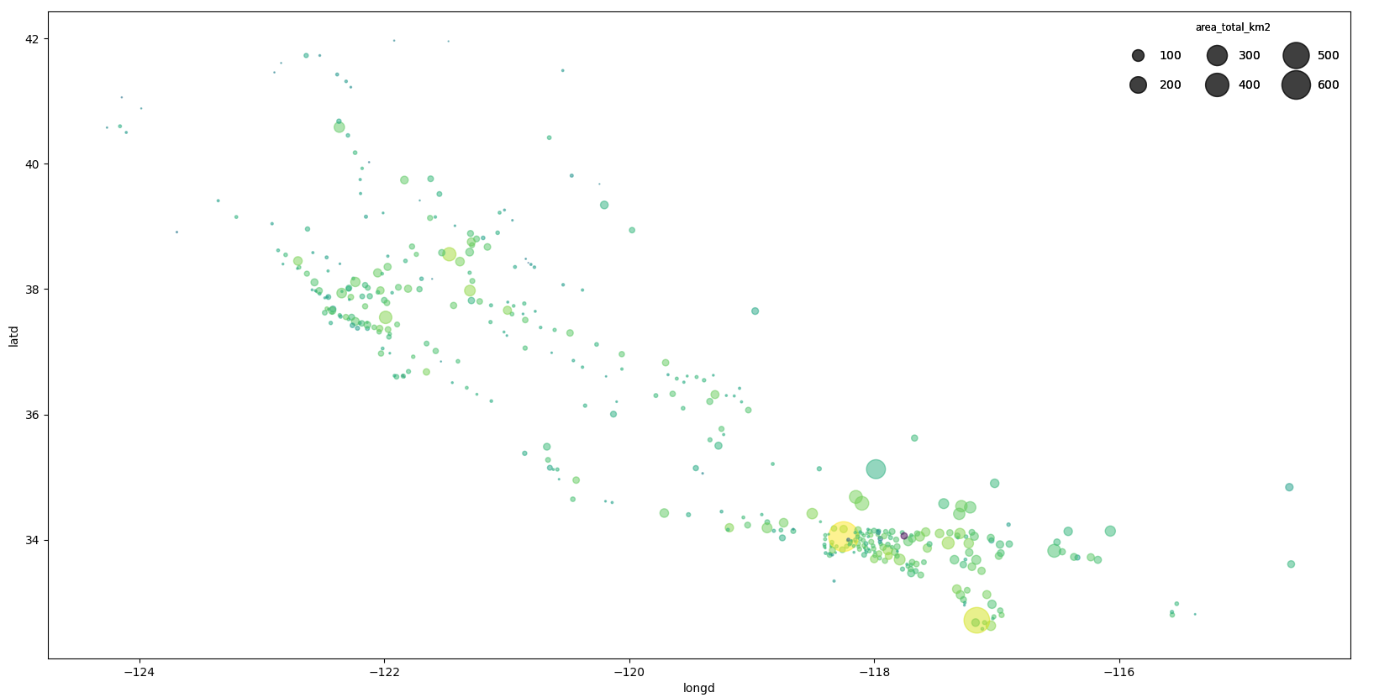

C:\Users\luisa\AppData\Local\Temp\ipykernel_12872\4150634320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_cities['log_poblacion'] = np.log10(cleaned_cities['population_total'])


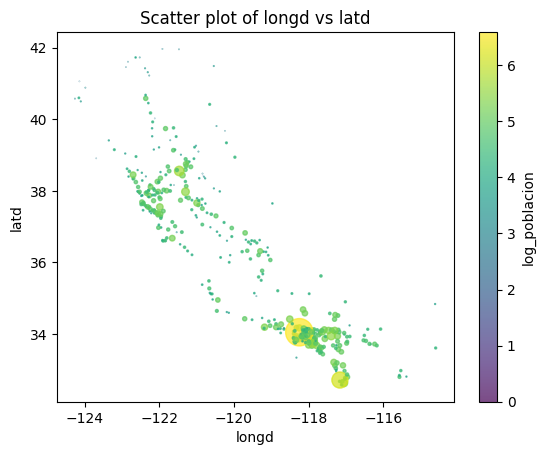

In [9]:

cleaned_cities['log_poblacion'] = np.log10(cleaned_cities['population_total'])

def scatter_plot(df, x_col, y_col, category_col=None, size=50, scale=1):
    """
    Function to create scatter plots.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        x_col (str): The name of the numeric column for the x-axis.
        y_col (str): The name of the numeric column for the y-axis.
        category_col (str, optional): The name of a categorical column for coloring points. Defaults to None.
        size (int or str): A fixed size for points (int) or the name of a column controlling point sizes (str).
        scale (float): A scaling factor for the point sizes if a column is used. Defaults to 1.

    Returns:
        None: Displays the scatter plot.
    """
    if isinstance(size, str):
        if size in df.columns:
            sizes = df[size] * scale
        else:
            raise ValueError(f"Column '{size}' not found in the dataframe.")
    else:
        sizes = size


    if category_col and category_col in df.columns:
        categories = df[category_col]
        plt.scatter(df[x_col], df[y_col], c=categories, s=sizes, cmap='viridis', alpha=0.7)
        plt.colorbar(label=category_col)
    else:
        plt.scatter(df[x_col], df[y_col], s=sizes, alpha=0.7)

   
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter plot of {x_col} vs {y_col}')

 
    plt.show()

scatter_plot(cleaned_cities, x_col='longd', y_col='latd', category_col='log_poblacion', size='population_total', scale=0.0001)


## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

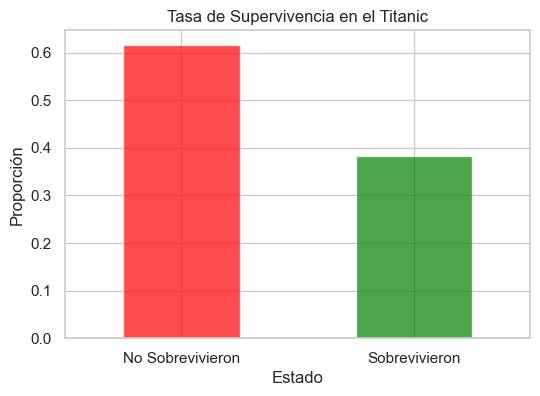

C:\Users\luisa\AppData\Local\Temp\ipykernel_12872\274861343.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='survived', data=titanic_data, ci=None, palette='viridis')
C:\Users\luisa\AppData\Local\Temp\ipykernel_12872\274861343.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=titanic_data, ci=None, palette='viridis')


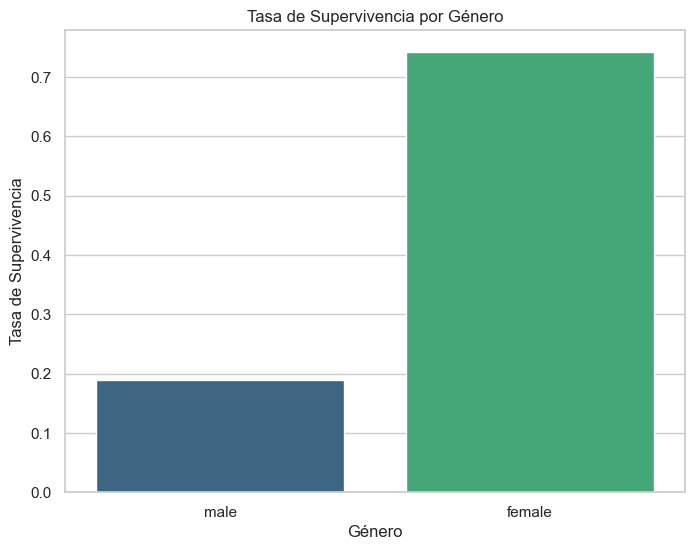

C:\Users\luisa\AppData\Local\Temp\ipykernel_12872\274861343.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=titanic_data, ci=None, palette='coolwarm')
C:\Users\luisa\AppData\Local\Temp\ipykernel_12872\274861343.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='survived', data=titanic_data, ci=None, palette='coolwarm')


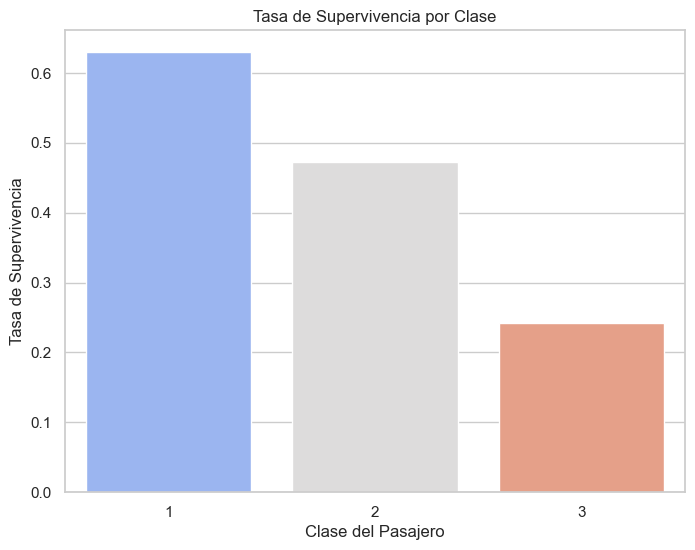

C:\Users\luisa\AppData\Local\Temp\ipykernel_12872\274861343.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='who', y='survived', data=titanic_data, ci=None, palette='pastel')
C:\Users\luisa\AppData\Local\Temp\ipykernel_12872\274861343.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='who', y='survived', data=titanic_data, ci=None, palette='pastel')


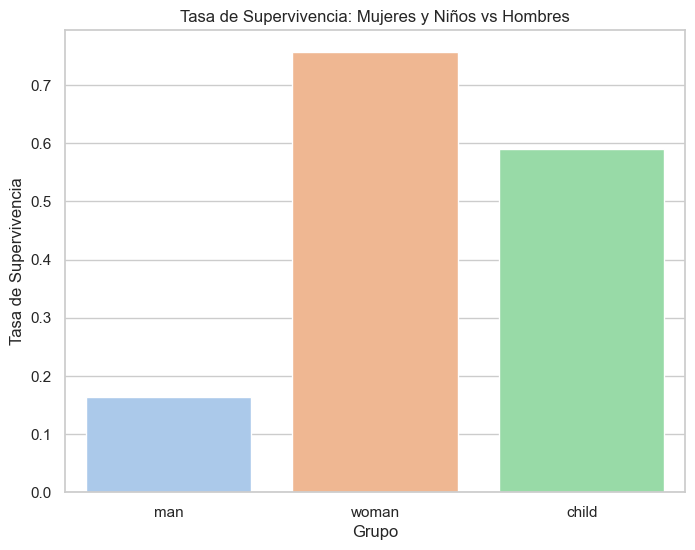

C:\Users\luisa\AppData\Local\Temp\ipykernel_12872\274861343.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='embarked', y='survived', data=titanic_data, ci=None, palette='magma')
C:\Users\luisa\AppData\Local\Temp\ipykernel_12872\274861343.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='embarked', y='survived', data=titanic_data, ci=None, palette='magma')


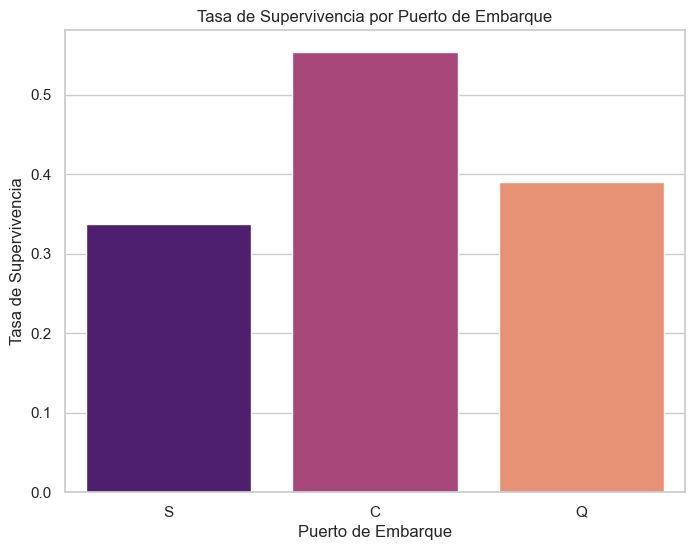

In [13]:
file_path = './data/titanic.csv'
titanic_data = pd.read_csv(file_path)

sns.set(style="whitegrid")


plt.figure(figsize=(6, 4))
survival_counts = titanic_data['survived'].value_counts(normalize=True)
survival_counts.plot(kind='bar', color=['red', 'green'], alpha=0.7)
plt.title('Tasa de Supervivencia en el Titanic')
plt.xticks([0, 1], ['No Sobrevivieron', 'Sobrevivieron'], rotation=0)
plt.ylabel('Proporción')
plt.xlabel('Estado')
plt.show()


plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='survived', data=titanic_data, ci=None, palette='viridis')
plt.title('Tasa de Supervivencia por Género')
plt.ylabel('Tasa de Supervivencia')
plt.xlabel('Género')
plt.show()


plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=titanic_data, ci=None, palette='coolwarm')
plt.title('Tasa de Supervivencia por Clase')
plt.ylabel('Tasa de Supervivencia')
plt.xlabel('Clase del Pasajero')
plt.show()


plt.figure(figsize=(8, 6))
sns.barplot(x='who', y='survived', data=titanic_data, ci=None, palette='pastel')
plt.title('Tasa de Supervivencia: Mujeres y Niños vs Hombres')
plt.ylabel('Tasa de Supervivencia')
plt.xlabel('Grupo')
plt.show()


plt.figure(figsize=(8, 6))
sns.barplot(x='embarked', y='survived', data=titanic_data, ci=None, palette='magma')
plt.title('Tasa de Supervivencia por Puerto de Embarque')
plt.ylabel('Tasa de Supervivencia')
plt.xlabel('Puerto de Embarque')
plt.show()
